In [0]:
# activate R magic
%load_ext rpy2.ipython

##**Pacote Caret** - Criando Modelos de Machine Learning em R

In [0]:
%%R
# Instalando os pacotes
install.packages("caret")
install.packages("randomForest")

# Carregando os pacotes
library(caret)
library(randomForest)
library(datasets)
data()

In [0]:
%%R
  data()

In [0]:
%%R
# Usando o dataset mtcars
head(mtcars)

                   mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1


##**Etapa 1** - Divisão Dados de Treino e Dados de Teste






In [0]:
%%R
# Funcao do Caret para divisao dos dados
#?createDataPartition - splitting data 
split <- createDataPartition(y = mtcars$mpg, p = 0.7, list = FALSE)
# 1. Dataset$coluna
# 2. Fator de divisão 70%
# 3. list = False  

# Cria uma espécie de índice chamado de "split"

## Usar o índice gerado no **DataPartion** para fazer a divisão 

In [0]:
%%R
# Criar dados de treino e de teste
dados_treino <- mtcars[split,]
dados_teste <- mtcars[-split,] # negativo indica tudo que "sobrou" de split e alocar nos dados de teste

##**Etapa 3** - Treinar o Modelo

1.   função do pacote **generics**
2.   função do pacote **caret**



In [0]:
%%R
# Treinar modelo
# ?train
names(getModelInfo()) #getModelInfo para visualizar tudo que está disponível no pacote Caret

  [1] "ada"                 "AdaBag"              "AdaBoost.M1"        
  [4] "adaboost"            "amdai"               "ANFIS"              
  [7] "avNNet"              "awnb"                "awtan"              
 [10] "bag"                 "bagEarth"            "bagEarthGCV"        
 [13] "bagFDA"              "bagFDAGCV"           "bam"                
 [16] "bartMachine"         "bayesglm"            "binda"              
 [19] "blackboost"          "blasso"              "blassoAveraged"     
 [22] "bridge"              "brnn"                "BstLm"              
 [25] "bstSm"               "bstTree"             "C5.0"               
 [28] "C5.0Cost"            "C5.0Rules"           "C5.0Tree"           
 [31] "cforest"             "chaid"               "CSimca"             
 [34] "ctree"               "ctree2"              "cubist"             
 [37] "dda"                 "deepboost"           "DENFIS"             
 [40] "dnn"                 "dwdLinear"           "dwdPoly"     

In [0]:
%%R
?varImp

---

##**Etapa 4** - Criar o Modelo

In [0]:
%%R
# Criar uma versão de modelo com todas as variáveis, aplicando o método de modelo linear
modelol_v1 <- train(mpg ~ ., data = dados_treino, method = "lm")

##Depois de criado o modelo, verificar quais as variáveis mais relevantes para treinar o modelo

### varImp( ) {caret} calcula a importância da variável para modelos de Regressão e Classificação 

In [0]:
%%R
# Calcuar a importância das variáveis
varImp(modelol_v1)

# Variáveis mais relevantes
# 1. wt
# 2. hp
# 3. am
# 4. qsec
# 5. disp

lm variable importance

      Overall
wt   100.0000
hp    64.0209
am    58.2232
qsec  58.0689
disp  52.7299
drat   7.0167
gear   5.8559
vs     2.5640
cyl    0.4579
carb   0.0000


## Rodar Modelos com as principais variáveis selecionadas por varImp

In [0]:
%%R
# Modelo treinado com Algoritmo Modelo Linear 
modelol_v1 <- train(mpg ~ wt + hp + qsec + drat, data = dados_treino, method = "lm")

In [0]:
%%R
# Random treinado com Algoritmo Random Forest
modelol_v2 <- train(mpg ~ wt + hp + qsec + drat, data = dados_treino, method = "rf")

### Multiple R-squared: 0.8549

In [0]:
%%R
# Resumo do modelo LM
summary(modelol_v1)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1367 -1.5674 -0.4359  0.7337  5.7474 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 24.17495   12.03104   2.009  0.05892 . 
wt          -3.54763    1.16550  -3.044  0.00668 **
hp          -0.02286    0.02319  -0.986  0.33661   
qsec         0.34337    0.52721   0.651  0.52265   
drat         1.21815    1.39554   0.873  0.39362   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.606 on 19 degrees of freedom
Multiple R-squared:  0.8549,	Adjusted R-squared:  0.8243 
F-statistic: 27.98 on 4 and 19 DF,  p-value: 9.932e-08



## Multiple R-squared:

In [0]:
%%R
# Resumo do modelo RF
summary(modelol_v2)

                Length Class      Mode     
call              4    -none-     call     
type              1    -none-     character
predicted        24    -none-     numeric  
mse             500    -none-     numeric  
rsq             500    -none-     numeric  
oob.times        24    -none-     numeric  
importance        4    -none-     numeric  
importanceSD      0    -none-     NULL     
localImportance   0    -none-     NULL     
proximity         0    -none-     NULL     
ntree             1    -none-     numeric  
mtry              1    -none-     numeric  
forest           11    -none-     list     
coefs             0    -none-     NULL     
y                24    -none-     numeric  
test              0    -none-     NULL     
inbag             0    -none-     NULL     
xNames            4    -none-     character
problemType       1    -none-     character
tuneValue         1    data.frame list     
obsLevels         1    -none-     logical  
param             0    -none-   

In [0]:
%%R
# Ajustando o modelo
# ?expand.grid {base} - similar a trainControl do {caret}
# ?trainControl

# utilizar o método cv de Cross Validation e criando 10 folders
controle1 <- trainControl(method = "cv", number = 10)

In [0]:
%%R
modelol_v3 <- train(mpg ~ wt + hp + qsec + drat, # variável alvo e preditoras selecionadas
                    data = dados_treino,    # dataset de treino
                    method = "lm",          # Método LM
                    trControl = controle1,  # adicionando o parâmetro controle1 criado anteriormente 
                    metric = "Rsquared")    # aplicando a métrica "Rsquared"


In [0]:
%%R
# Resumo do modelo Multiple R-squared: 0.8549
summary(modelol_v3)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1367 -1.5674 -0.4359  0.7337  5.7474 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 24.17495   12.03104   2.009  0.05892 . 
wt          -3.54763    1.16550  -3.044  0.00668 **
hp          -0.02286    0.02319  -0.986  0.33661   
qsec         0.34337    0.52721   0.651  0.52265   
drat         1.21815    1.39554   0.873  0.39362   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.606 on 19 degrees of freedom
Multiple R-squared:  0.8549,	Adjusted R-squared:  0.8243 
F-statistic: 27.98 on 4 and 19 DF,  p-value: 9.932e-08



## Erros de Previsão do Modelo

In [0]:
%%R
# Coletando os residuos, erros de previsão do modelo 
residuals <- resid(modelol_v3)
residuals

      Mazda.RX4.Wag          Datsun.710      Hornet.4.Drive            Merc.230 
        -1.05542070         -2.09810841          0.71869599         -0.66618708 
           Merc.280           Merc.280C          Merc.450SE          Merc.450SL 
        -1.01765127         -2.62367522          1.06509822          0.69022881 
        Merc.450SLC  Cadillac.Fleetwood Lincoln.Continental   Chrysler.Imperial 
        -1.36973890         -0.20569932          0.60990251          4.82978113 
        Honda.Civic      Toyota.Corolla       Toyota.Corona    Dodge.Challenger 
         0.77866594          5.74741658         -3.09024351         -1.91241870 
        AMC.Javelin          Camaro.Z28    Pontiac.Firebird           Fiat.X1.9 
        -3.13669743         -1.48533328          3.06055777          0.03895885 
      Porsche.914.2        Lotus.Europa      Ford.Pantera.L          Volvo.142E 
         0.36690327          3.78086309         -1.21224635         -1.81365199 


## Calcular previsões

In [0]:
%%R
# Previsoes
?predict {stats}
predictedValues <- predict(modelol_v1, dados_teste)
predictedValues

        Mazda RX4 Hornet Sportabout           Valiant        Duster 360 
         22.76778          17.65120          19.80448          15.25740 
        Merc 240D          Fiat 128      Ferrari Dino     Maserati Bora 
         22.80285          26.51664          20.07872          13.17581 


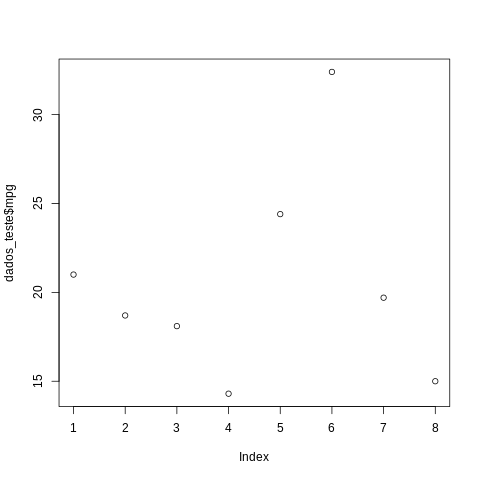

In [0]:
%%R
plot(dados_teste$mpg) #plotar dados originais

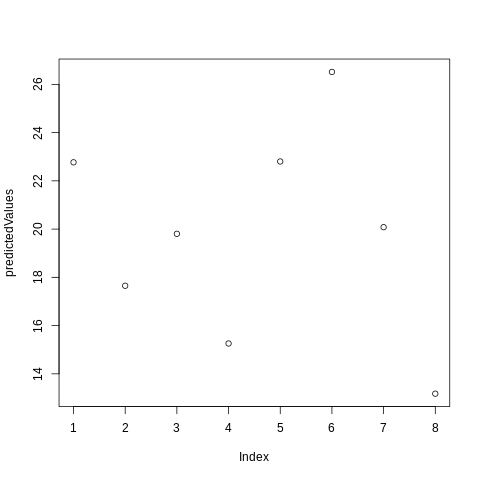

In [0]:
%%R
   plot(predictedValues)  #plotar dados previstos

## Plot das variáveis mais importantes para esse modelo

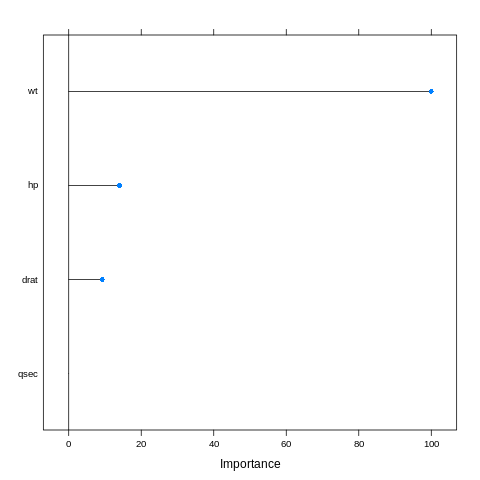

In [0]:
%%R
# Plot das variáveis mais relevantes no modelo
plot(varImp(modelol_v1))